In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [22]:
df = pd.read_csv('Landslide Civildf_new.csv')
df.head()

,Unnamed: 0,Timestamp,Rainfall,Water level,Inc30mup,Inc30mdown,Inc20mup,Inc20mdown,Inc10mup,Inc10mdown,1stTensiometer,2ndTensiometer,3rdTensiometer,4thTensiometer,5thTensiometer
0,0,01-12-2022 01:00,0.0,-177.753910,24.520339,31.058241,16.023206,26.345443,20.637553,25.830825,-48.832508,-49.926434,181.57994,-3.156536,-48.597010
1,1,01-12-2022 02:00,0.0,-104.417316,26.093114,37.702314,15.116429,36.349078,20.836093,29.274305,-48.868384,-49.929076,181.60057,-3.142777,-48.629946
2,2,01-12-2022 03:00,0.0,-158.065690,29.426647,27.552242,20.673672,31.637946,20.879557,26.278678,-48.895732,-49.930162,181.61358,-3.129418,-48.652374
3,3,01-12-2022 04:00,0.0,-189.458110,30.382570,34.624852,21.397603,27.999477,22.426564,25.463844,-48.914294,-49.932082,181.61197,-3.137719,-48.671676
4,4,01-12-2022 05:00,0.0,-197.408960,25.493729,29.837320,18.103459,31.207890,23.932405,28.861409,-48.914736,-49.932394,181.62403,-3.137719,-48.673116


In [23]:
print (df.columns)

Index(['Unnamed: 0', 'Timestamp', 'Rainfall', 'Water level', 'Inc30mup',
       'Inc30mdown ', 'Inc20mup ', 'Inc20mdown', 'Inc10mup', 'Inc10mdown',
       '1stTensiometer', '2ndTensiometer', '3rdTensiometer ', '4thTensiometer',
       '5thTensiometer'],
      dtype='object')


In [24]:
df=df.drop(columns=['Unnamed: 0'])

In [31]:
# Assuming df is your DataFrame and 'Timestamp' is the column containing date strings
# Swap day and month in the date strings
df['Timestamp'] = df['Timestamp'].str.replace(r'(\d{2})-(\d{2})-(\d{4})', r'\2-\1-\3', regex=True)

# Now, convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m-%d-%Y %H:%M')

# Now you should be able to work with the 'Timestamp' column as datetime objects


In [33]:
df = df.fillna(df.mean())


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
num_cols=['Rainfall', 'Water level', 'Inc30mup',
       'Inc30mdown ', 'Inc20mup ', 'Inc20mdown', 'Inc10mup', 'Inc10mdown',
       '1stTensiometer', '2ndTensiometer', '3rdTensiometer ', '4thTensiometer',
       '5thTensiometer']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [35]:
# Convert datetime64[ns] to int64 (nanoseconds since the epoch)
df['Timestamp'] = pd.to_datetime(df['Timestamp']).astype('int64')

# Now you can convert int64 to the desired dtype, such as int32
df['Timestamp'] = (df['Timestamp'] / 10**9).astype('int32')  # Convert nanoseconds to seconds (divide by 10^9)


In [36]:
features_inc = df[['Rainfall', 'Water level', 'Inc30mup',
       'Inc30mdown ', 'Inc20mup ', 'Inc20mdown', 'Inc10mup', 'Inc10mdown',
       '1stTensiometer', '2ndTensiometer', '3rdTensiometer ', '4thTensiometer',
       '5thTensiometer']]
features_ms = df[['Timestamp', 'Rainfall']]


In [37]:
features_inc = features_inc.values.reshape((features_inc.shape[0], 1, features_inc.shape[1]))
features_ms = features_ms.values.reshape((features_ms.shape[0], 1, features_ms.shape[1]))


In [63]:
from sklearn.model_selection import train_test_split

target_inc = df['Inc10mdown']
target_ms = df['1stTensiometer']
X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(features_inc, target_inc, test_size=0.45, random_state=42)

X_train_ms, X_test_ms, y_train_ms, y_test_ms = train_test_split(features_ms, target_ms, test_size=0.25, random_state=42)


In [64]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

#Bi-directional LSTM model
model1 = Sequential()
model1.add(Bidirectional(LSTM(units=1, return_sequences=True), input_shape=(X_train_inc.shape[1], X_train_inc.shape[2])))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train
model1.fit(X_train_inc, y_train_inc, epochs=200, batch_size=32)


Epoch 1/200
12/12 [==============================] - 4s 3ms/step - loss: 0.4671
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 0.4236
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 0.3863
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.3534
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 0.3226
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 0.2912
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2600
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2283
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1972
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1681
Epoch 11/200
12/12 [==============================] - 0s 3ms/step - loss: 0.1412
Epoch 12/200
12/12 [==============================] - 0s 5ms/step - loss: 0.1189
Epoch 13/200
12/12 [=================

In [65]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

#Bi-directional LSTM model
model2 = Sequential()
model2.add(Bidirectional(LSTM(units=20, return_sequences=True), input_shape=(X_train_inc.shape[1], X_train_inc.shape[2])))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train
model2.fit(X_train_inc, y_train_inc, epochs=200, batch_size=32)


Epoch 1/200
12/12 [==============================] - 4s 3ms/step - loss: 0.1772
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 8/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 10/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 11/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 12/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 13/200
12/12 [=================

In [66]:
#Predictions
y_pred_inc1 = model1.predict(X_test_inc)
y_pred_inc2 = model2.predict(X_test_inc)



10/10 [==============================] - 1s 2ms/step


In [68]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Reshape y_pred_inc to 2D
y_pred_inc_21d = np.reshape(y_pred_inc1, (y_pred_inc1.shape[0], y_pred_inc1.shape[2]))

y_pred_inc_22d = np.reshape(y_pred_inc2, (y_pred_inc2.shape[0], y_pred_inc2.shape[2]))

#mean squared error
mse1 = mean_squared_error(y_test_inc, y_pred_inc_21d)
print('Mean Squared Error1:', mse1)
mse2 = mean_squared_error(y_test_inc, y_pred_inc_22d)
print('Mean Squared Error2:', mse2)
r21 = r2_score(y_test_inc, y_pred_inc_21d)
print('R-squared Score1:', r21)
r22 = r2_score(y_test_inc, y_pred_inc_22d)
print('R-squared Score2:', r22)

Mean Squared Error1: 0.0018342461120538765
Mean Squared Error2: 1.2111770009402951e-05
R-squared Score1: 0.96331591318996
R-squared Score2: 0.9997577701162738


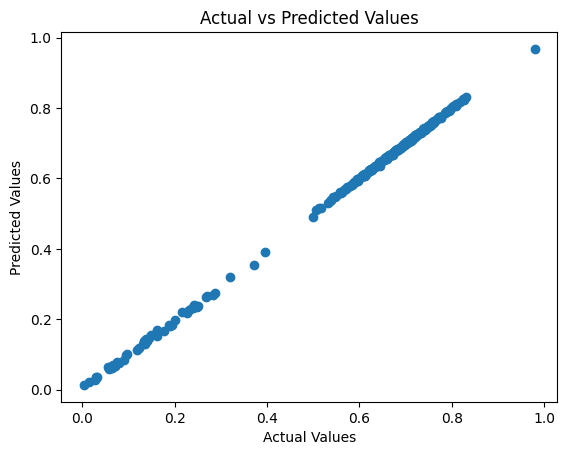

In [69]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test_inc, y_pred_inc_22d)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


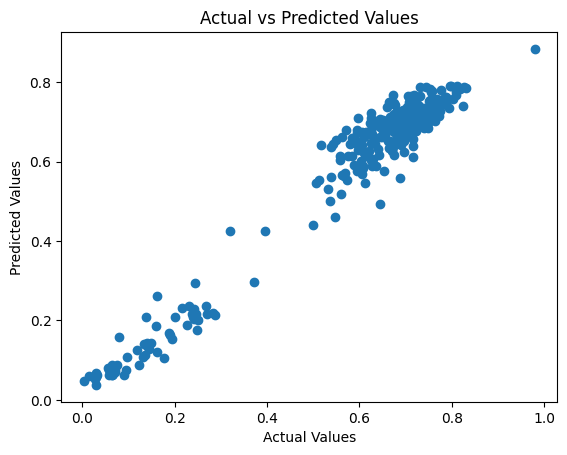

In [70]:
plt.scatter(y_test_inc, y_pred_inc_21d)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


C:\Users\aryam\AppData\Local\Temp\ipykernel_2488\1130023919.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlBu')
C:\Users\aryam\AppData\Local\Temp\ipykernel_2488\1130023919.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  sc = plt.scatter(y_test_inc, y_pred_inc_21d, c=dot_color, cmap=cmap, norm=norm, s=70) # s parameter changes the size of dots


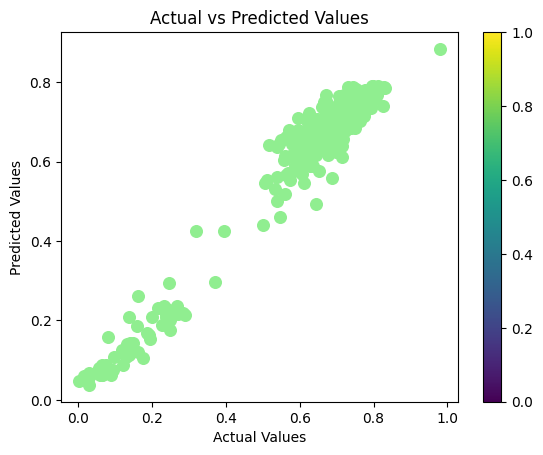

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Create a colormap
cmap = plt.cm.get_cmap('RdYlBu')

# Normalize the values in y_pred_inc_21d for the colormap
norm = plt.Normalize(y_pred_inc_21d.min(), y_pred_inc_21d.max())

# Set a constant light green color
dot_color = 'lightgreen'

# Create a scatter plot with colorbar
sc = plt.scatter(y_test_inc, y_pred_inc_21d, c=dot_color, cmap=cmap, norm=norm, s=70) # s parameter changes the size of dots
plt.colorbar(sc)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
